# Logistic Regression

In [20]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from scipy import optimize


In this part, we will solve a`classification problem`. 
Classification ploblems are just like the regression problems except that the values we want to predict is only a small number of discrete values.

### Examples:
- spam / not spam 
- Tumor:Malignant/Benign	

---------------
## Part One
---------------

#### Firstly, we will define the Basic equations of Logistic Regression model.

### 1- Hypothesis

### $ h_\theta(x) = g(\theta^T x)$   
&nbsp; &nbsp; &nbsp; &nbsp; where &nbsp; 0 <$ h_\theta(x) <1 \\ $ 

### $g(\theta^T x)$= $\frac{1}{1-e^(\theta^T x)}$

And this's what called `sigmoid fuction`, or logistic function.

The concept of hypothesis also can be described by conditional probability: 

### $ h_\theta(x) = P(y=1 | x;\theta)$  &nbsp;  &nbsp;  &nbsp;

### $So, when$  &nbsp; $ h_\theta(x) = P(y=1 | x;\theta) =0.7, then$ &nbsp; $ h_\theta(x) = P(y=0 | x;\theta) = 0.3$

In [2]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


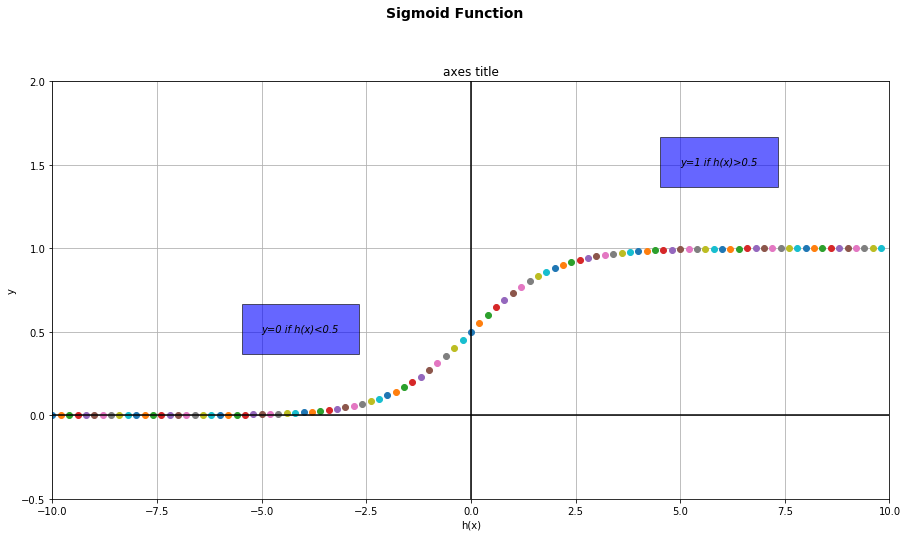

In [3]:
x = np.array([np.arange(-10., 10., 0.2)])
sig = sigmoid(x)

fig = plt.figure(figsize=(15,8))
fig.suptitle('Sigmoid Function ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('h(x)')
ax.set_ylabel('y')
ax.plot(x, sig, 'o')

ax.text(5, 1.5, 'y=1 if h(x)>0.5', style='italic',bbox={'facecolor':'blue', 'alpha':0.6, 'pad':20})
ax.text(-5, 0.5, 'y=0 if h(x)<0.5', style='italic',bbox={'facecolor':'blue', 'alpha':0.6, 'pad':20})

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax.axis([-10, 10, -0.5, 2])
ax.grid(True)
plt.show()


### 2- Cost Function 
The logistic model's cost function is different than linear regression one, because if we apply the same equation, the cost function will be non-convex.

so, the logistic regression new cost function is: 

### $\begin{equation}
  cost(h_\theta(x),y) =
    \begin{cases}
        \text{ -log($h_\theta(x)$) ... if y=1}\\
        \text{-log($1-h_\theta(x)$) ... if y=0}\\
    \end{cases}       
\end{equation}$

##### but the simple version written as : 

### $ cost(h_\theta(x),y) = -y log(h_\theta(x)) - (1-y) log(1- h_\theta(x)) $

##### So, now we can write the overall structure of the equation:

### $ J(\theta) = \frac{-1}{m} \sum_{i=1}^{m} cost(h_\theta(x),y) $


In [4]:
def costFunction(theta,x,y):
    m= y.size
    h= sigmoid(x.dot(theta))
    cost_= (-1/m)*(y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    
   
    return cost_

### 3-Gradient Decsent / Minimization Function

In [5]:
def gradientDescent(theta, x, y):
    m=y.size
    z = np.dot(x,theta)
    h= sigmoid(z)
    error = h.T - y
    grad = (1 / m) * np.dot(error, x)
    return grad
def optimization (theta,x,y):
    return minimize(costFunction, theta, args=(x,y), method=None, jac=gradientDescent, options={'maxiter':400})


### Now, lets start solving the exercise ... 

Suppose that you are the administrator of an university department and you want to determine each applicant’s chance of admission based on their results on two exams. 

So, we aim to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

##### a- Uploading and Visualization 

In [6]:
data = np.loadtxt('Datasets/ex2data1.txt', delimiter=',')
X = np.array(data[:,0:2])
X = np.insert(X,0,1,axis=1)
y= data[:,2].T
theta =np.zeros([X.shape[1],1])

In [7]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);


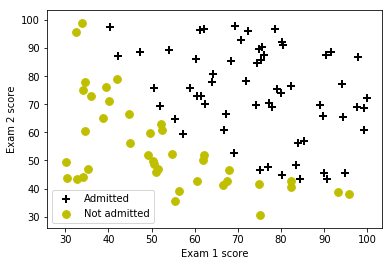

In [8]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

#### b- Fit the parameters theta to estimate the decision boundary line equation
Now, lets us firstly compare between the cost of using gradient descent and the minimize function, then plot the decision boundary. 


In [9]:
grad_theta = gradientDescent(theta,X,y)
opt_theta= optimization(theta, X,y).x

print ('The fitted parameters', grad_theta[0,:], 'have a cost', costFunction(theta,X,y))

print ('The fitted parameters', opt_theta, 'have a cost', costFunction(opt_theta,X,y))


The fitted parameters [ -0.1        -12.00921659 -11.26284221] have a cost [0.69314718]
The fitted parameters [-25.16133284   0.2062317    0.2014716 ] have a cost 0.20349770158944375


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


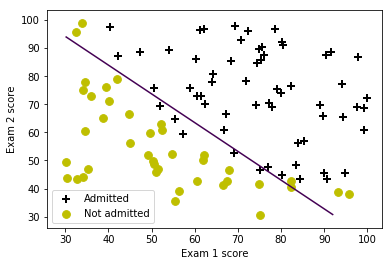

In [10]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(opt_theta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5])

#### c- Prediction:

As we know from the sigmoid function, y=1 when $h_\theta(x)$ > 0.5, and vise versa. 

so from this rule, we can predict where the new inputs are belong, based on the new fitted parameters $\theta$

In [11]:
def prediction(theta, x):
    threshold=0.5
    result= sigmoid(np.dot(x,theta.T)) >= threshold
    return result.astype('int')

#### d- Case Study

In [12]:
"""""
We'll assume that we have two students, the first student's score at the first exam= 30, and the second exam = 50
while the second student's score at the first exam= 40, and the second exam = 100
"""""
case1= np.array([1,30,50])
case2= np.array([1,40,100])

def result(result):
    if result == 0:
        result='not admitted'
    else:
        result= 'admitted'
    return result

print( 'case 1 -with score1 = 30 and score2=50- is ', result(prediction(opt_theta,case1)))
print( 'case 2 -with score1 = 40 and score2=100- is ', result(prediction(opt_theta,case2)))

case 1 -with score1 = 30 and score2=50- is  not admitted
case 2 -with score1 = 40 and score2=100- is  admitted


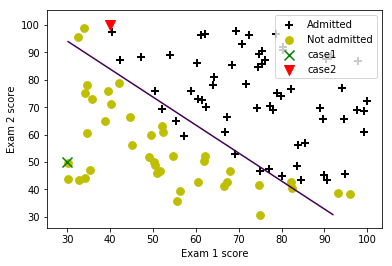

In [13]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.scatter(case1[1], case1[2], s=100, c='g', marker='x', label='case1')
plt.scatter(case2[1], case2[2], s=100, c='r', marker='v', label='case2')
plt.legend(frameon= True, fancybox = True);

x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(opt_theta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5])

---------------
## Part Two
---------------

### Overfitting problem

If we have too many features, the learned hypothesis may fit the training set very well, with almost zero cost. but fail to generalize to new examples. 
otherwise, if we have a lot of features, and very little training data, overfitting can occurs. 

- ###### Adressing overfitting: 

1- Reduce number of features

2- Regularization 


### Regularization Method

The prupose of regularization, is to reduce the affect -or the wieght- of theta parameters, by adding thetas with reverse signs, and multiplying them by a specific factor.


### $ J(\theta) = \frac{-1}{m}[\sum_{i=1}^{m}-y log(h_\theta(x)) - (1-y) log(1- h_\theta(x))]  +  \frac{\gamma }{2m} [\sum_{i=1}^{n} \theta_j^2]$


In [14]:
def Reg_costFunction(theta,x,y, regPar):
    m= y.size
    h= sigmoid(x.dot(theta))
    cost_= (-1/m)*(y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))+(regPar/(2*m))*np.sum(np.square(theta[1:]))
    
    return cost_

#### And we should apply the same rule on gradient descent and/or minimization functions

In [15]:
def Reg_gradientDescent(theta, x, y, regPar ):
    m=y.size
    z = np.dot(x,theta)
    h= sigmoid(z)
    error = h.T - y
    grad = (1 / m) * np.dot(error, x)
    reg_term= regPar/(m)*np.sum(np.square(theta[1:]))
    reg_grad= grad + reg_term

    return reg_grad

def optimization (theta,x,y, regPar):
    result = optimize.minimize(Reg_costFunction, theta, args=(x, y, regPar),  method='BFGS', options={"maxiter":500, "disp":False} )
    return result
    

### *The Exercise:*
we will implement regularized logistic regression; to predict whether microchips from a fabrication plant passes quality assurance (QA).

Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [16]:
data2 = np.loadtxt('Datasets/ex2data2.txt', delimiter=',')
X2 = np.array(data2[:,0:2])
ones= np.ones([data2.shape[0]])
X2 = np.insert(X2,0,1,axis=1)
y2 = data2[:,2].T
theta2 = np.zeros([X2.shape[1],1])

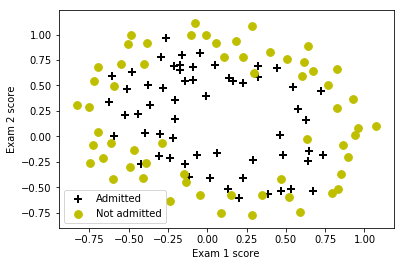

In [17]:
plotData(data2, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

#### Because the distribution of the data implies that it needs a polynomial(non-linear) decision boundary, such as:
### $ g(\theta_0 + \theta_1 + \theta_1^2+\theta_1 \theta_2+ \theta_2^3 ...)$
#### we need to apply the following function: 


In [18]:
def map_feature( feature1, feature2 ):

    degrees = 6
    out = np.ones( (feature1.shape[0], 1) )

    for i in range(1,degrees+1):
        for j in range(0,i+1):
            term1 = feature1 ** (i-j)
            term2 = feature2 ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [27]:
theta2 = np.zeros(XX.shape[1])
cost= Reg_costFunction(theta2,XX, y2, 1)
print ('The cost value =', cost)

The cost value = 0.6931471805599453


## Non-linear Decision Boundary

In [49]:
XX= map_feature(X2[:,1], X2[:,2])
theta2 = np.zeros([XX.shape[1],1])

num=[0,1,50,100]
thetas= np.zeros([theta2.shape[0],4])

for i in range(len(num)):
    op_theta= optimization(theta2.T, XX, y2 ,num[i]).x
    thetas[:,i]= op_theta
    
def Reg_Boundary(theta):
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = map_feature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()
    
    u, v = np.meshgrid( xvals, yvals )
    plt.contour( xvals, yvals, zvals, [0])

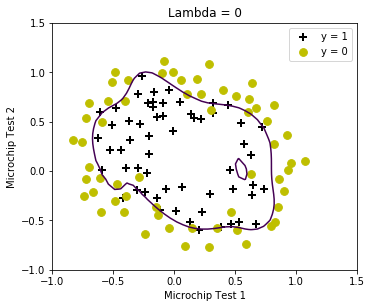

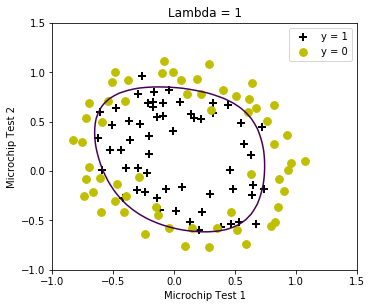

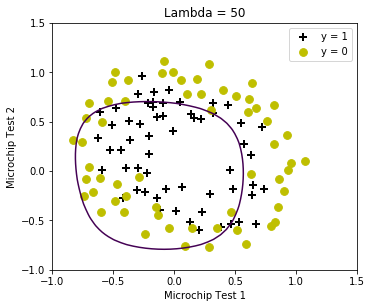

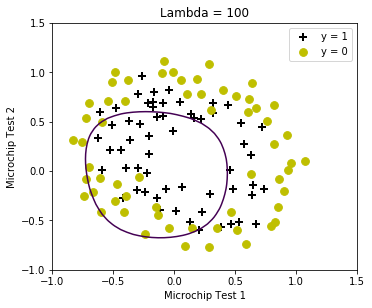

In [60]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plt.title('Lambda = %d'%num[0])
Reg_Boundary(thetas[:,0])

plt.figure(figsize=(12,10))
plt.subplot(222)
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plt.title('Lambda = %d'%num[1])
Reg_Boundary(thetas[:,1])

plt.figure(figsize=(12,10))
plt.subplot(223)
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plt.title('Lambda = %d'%num[2])
Reg_Boundary(thetas[:,2])

plt.figure(figsize=(12,10))
plt.subplot(224)
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plt.title('Lambda = %d'%num[3])
Reg_Boundary(thetas[:,3])